# Homework6
## Jiaqi Ma
## USC ID: 3028009001

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('Caravan.csv')

In [5]:
df[:5]

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [6]:
train = df[:1000]
test = df[1000:]

In [7]:
train.shape

(1000, 86)

In [8]:
test.shape

(4822, 86)

1. Use 2 pivot tables to show that the variables PVRAAUT and AVRAAUT are highly unbalanced (having most rows belonging to a few categories). Remove these variables from the dataset.

In [9]:
# highly unbalanced
df.PVRAAUT.value_counts()

0    5813
6       7
4       1
9       1
Name: PVRAAUT, dtype: int64

In [10]:
# highly unbalanced
df.AVRAAUT.value_counts()

0    5813
1       6
2       2
3       1
Name: AVRAAUT, dtype: int64

In [11]:
# training set
pd.crosstab(train['PVRAAUT'], train['AVRAAUT'])

AVRAAUT,0
PVRAAUT,
0,1000


In [12]:
# test set
pd.crosstab(test['PVRAAUT'], test['AVRAAUT'])

AVRAAUT,0,1,2,3
PVRAAUT,,,,
0,4813,0,0,0
4,0,1,0,0
6,0,5,2,0
9,0,0,0,1


In [13]:
# all set
pd.crosstab(df['PVRAAUT'], df['AVRAAUT'])

AVRAAUT,0,1,2,3
PVRAAUT,,,,
0,5813,0,0,0
4,0,1,0,0
6,0,5,2,0
9,0,0,0,1


In [14]:
# remove these variables from the dataset
X_train = train.drop(['PVRAAUT', 'AVRAAUT', 'Purchase'], axis = 1)
y_train = train['Purchase']

In [15]:
X_test = test.drop(['PVRAAUT', 'AVRAAUT', 'Purchase'], axis = 1)
y_test = test['Purchase']

2. Fit a random forest model with 500 trees and max_features = 29 to the training set with Purchase as the response and the other variables as predictors. Use random_state = 1. What predictor appears to be the most important? Report the test accuracy rate.

In [16]:
forest = RandomForestClassifier(max_features = 29, n_estimators = 500,
                                max_depth = 4, random_state = 1)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9398589796764828

In [17]:
# test accuracy rate is 0.9399

In [18]:
df2 = pd.DataFrame(forest.feature_importances_*100,
                   index = X_train.columns,
                   columns = ['Importance'])
df2 = df2.sort_values(by = 'Importance', axis = 0, ascending = False)
df2[:5]

,Importance
PPLEZIER,7.980204
PPERSAUT,7.740589
APLEZIER,5.469169
MKOOPKLA,3.954903
MOPLHOOG,3.715494


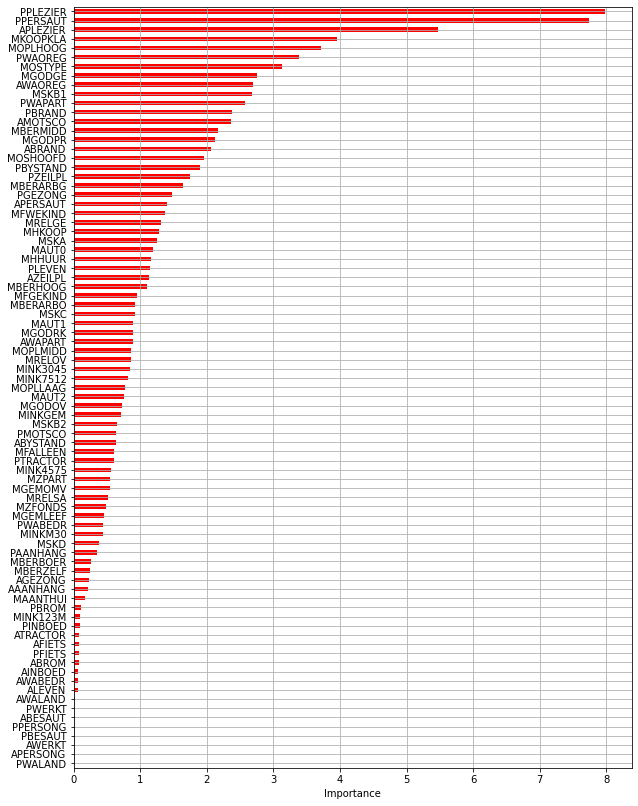

In [19]:
df2 = df2.sort_values(by = 'Importance', axis = 0)
df2.plot(kind = 'barh', color = 'r', legend = False, figsize = (10,14))
plt.xlabel('Importance')
plt.grid()
# 'PPLEZIER' is the most important

3. Fit a boosting model to the training set with max_depth = 4 and Purchase as the response and the other variables as predictors. Use 1000 trees, and learning rate 0.01. What predictor appears to be the most important? Report the test accuracy rate.

In [20]:
boosting = GradientBoostingClassifier(n_estimators = 1000,
                                      learning_rate = 0.01,
                                      max_depth = 4, random_state = 1)
boosting.fit(X_train, y_train)
boosting.score(X_test, y_test)

0.9332227291580257

In [21]:
# test accuracy rate is 0.9332

In [22]:
df3 = pd.DataFrame(boosting.feature_importances_*100,
                   index = X_train.columns,
                   columns = ['Importance'])
df3 = df3.sort_values(by = 'Importance', axis = 0, ascending = False)
df3[:5]

,Importance
PPERSAUT,6.735328
MOSTYPE,5.697374
MOPLHOOG,5.001042
MGODGE,4.953308
MKOOPKLA,4.598013


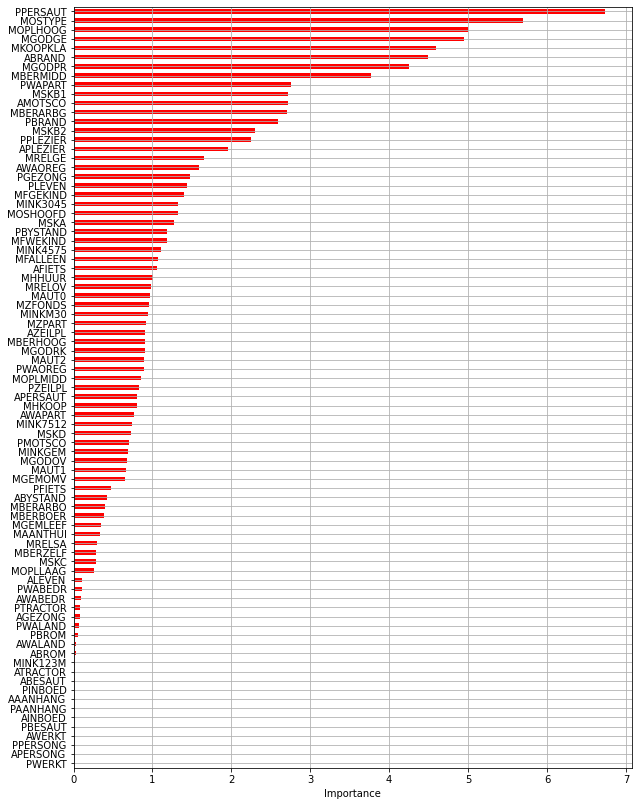

In [23]:
df3 = df3.sort_values(by = 'Importance', axis = 0)
df3.plot(kind = 'barh', color = 'r', legend = False, figsize = (10,14))
plt.xlabel('Importance')
plt.grid()
# 'PPERSAUT' is the most important

4. Report the test accuracy rate when KNN is used to predict Purchase. Use 5-fold cross validation to find the best number of neighbors.

In [24]:
# use 5-fold cross validation to find the best number of neighbors

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1)

In [27]:
train_acc_rate = []
nn = range(1,10)
for k in nn:
    scaler = MinMaxScaler()
    KNN = KNeighborsClassifier(n_neighbors = k)
    pipe = Pipeline([('transformer', scaler), ('estimator', KNN)])
    scores = cross_val_score(pipe, X_train, y_train, cv = kfold)
    train_acc_rate.append(scores.mean())

In [28]:
max4 = max(train_acc_rate)
max4

0.9410000000000001

In [29]:
train_acc_rate.index(max4)

5

In [30]:
# 5-fold cross validation selects k=6 neighbors

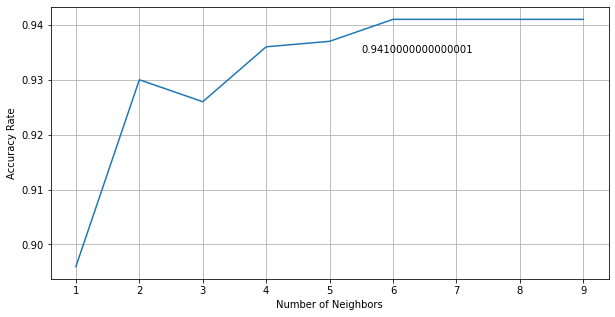

In [31]:
plt.figure(figsize = (10,5))
plt.plot(nn, train_acc_rate)
plt.ylabel('Accuracy Rate')
plt.xlabel('Number of Neighbors')
plt.annotate(max4, (5.5, 0.935))
plt.grid()

In [32]:
# report the test accuracy rate

In [33]:
# scale the data
scaler = MinMaxScaler()

In [34]:
scaler.fit(X_train)

MinMaxScaler()

In [35]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN.fit(X_train_scaled, y_train)
KNN.score(X_test_scaled, y_test)

0.9400663625051846

In [37]:
# the test accuracy rate is 0.9401

5. Find the test accuracy rate when logistic regression is used to predict Purchase.

In [38]:
LG = LogisticRegression(solver = 'lbfgs')
LG.fit(X_train_scaled, y_train)
LG.score(X_test_scaled, y_test)

0.9400663625051846

In [39]:
# the test accuracy rate is 0.9401